# 2020 Ford GoBike System Data
## by Tanmay Jain

Ford GoBike is a public bicycle sharing system located in San Francisco, California. They launched in June of 2017 and they have over 2,600 bicycles and 262 stations across San Francisco. These bikes can be unlocked from one station and returned to another station in the city. The bikes are available 24/7 all year long and riders can be subscribers or one-time customers.

## Table of Contents
<ul>
    <li><a href='#wrangle'>Preliminary Wrangling</a></li>
    <li><a href='#univariate'>Univariate Exploration</a></li>
    <li><a href='#bivariate'>Bivariate Exploration</a></li>
    <li><a href='#multivariate'>Multivariate Exploration</a></li>
</ul>

<a id='wrangle'></a>
## Preliminary Wrangling
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The dataset contains data for all the rides made in February 2020.

In [1]:
# import all packages and set plots to be embedded inline
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#reading the dataset
df=pd.read_csv('202002-baywheels-tripdata.csv')

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,62083,2020-02-29 18:32:30.5750,2020-03-01 11:47:14.0850,176.0,MacArthur BART Station,37.828410,-122.266315,267.0,Derby St at College Ave,37.861804,-122.253569,1993,Customer,NaN
1,1364,2020-02-29 23:53:53.7190,2020-03-01 00:16:37.9720,375.0,Grove St at Masonic Ave,37.774836,-122.446546,506.0,7th Ave at Clement St,37.782439,-122.465377,12402,Customer,NaN
2,836,2020-02-29 23:54:03.1970,2020-03-01 00:07:59.8490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,454.0,7th Ave at Cabrillo St,37.775176,-122.465007,2302,Customer,NaN
3,1004,2020-02-29 23:48:34.6480,2020-03-01 00:05:19.2020,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,200.0,2nd Ave at E 18th St,37.800214,-122.253810,902,Customer,NaN
4,1007,2020-02-29 23:48:25.9000,2020-03-01 00:05:13.4490,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,200.0,2nd Ave at E 18th St,37.800214,-122.253810,11578,Customer,NaN


In [4]:
df.shape

(432354, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432354 entries, 0 to 432353
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             432354 non-null  int64  
 1   start_time               432354 non-null  object 
 2   end_time                 432354 non-null  object 
 3   start_station_id         161723 non-null  float64
 4   start_station_name       161723 non-null  object 
 5   start_station_latitude   432354 non-null  float64
 6   start_station_longitude  432354 non-null  float64
 7   end_station_id           162194 non-null  float64
 8   end_station_name         162194 non-null  object 
 9   end_station_latitude     432354 non-null  float64
 10  end_station_longitude    432354 non-null  float64
 11  bike_id                  432354 non-null  int64  
 12  user_type                432354 non-null  object 
 13  rental_access_method     317843 non-null  object 
dtypes: f

In [6]:
#Making the start_time and end_time more datatype accurate to increase its usability
df.start_time=pd.to_datetime(df.start_time)
df.end_time=pd.to_datetime(df.end_time)

In [7]:
#Creating seperate columns for hours, days to use them afterwards
df['start_hour']=df.start_time.dt.hour

In [8]:
df['duration_min']=df.duration_sec/60

In [9]:
df['start_day']=df.start_time.dt.strftime('%a')
df['start_month']=df.start_time.dt.strftime('%b')

### What is the structure of your dataset?

> The dataset contains entries of 432354 rides with 14 features each.

### What is/are the main feature(s) of interest in your dataset?

> The features of interest in the dataset are features like 
    <ul>
        <li>Average Ride Duration</li>
        <li>Average Ride Distance</li>
        <li>Most Popular Days of the Week.</li>
        <li>Most Common Start and End points of Rides.</li> 
    </ul>
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Features like `start_time, end_time, start_station_name, end_station_name, duration_sec` will help me in investigation of the dataset.

<a id='univariate'></a>
## Univariate Exploration

#### How long rides do people usually take?

In [10]:
df.duration_sec.max()

86317

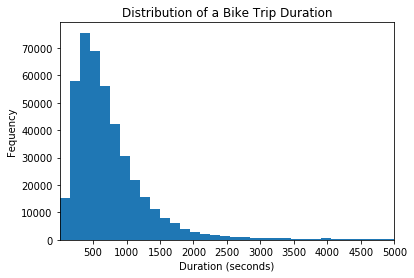

In [11]:
#Creating bin size
bin_edges = np.arange(0, df.duration_sec.max() + 150 , 150)
#Plotting the graph
plt.hist(data = df , x = "duration_sec", bins = bin_edges)
plt.title("Distribution of a Bike Trip Duration")
ticks = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
plt.xticks(ticks)
plt.xlim(0,5000)
plt.xlabel("Duration (seconds)")
plt.ylabel("Fequency");

> From the above distribution, we can see that the distribution is positively skewed.
It is clear from the graph that most of the rides are of around 500 secs, i.e. around 8-9 minutes. The longest ride ever was 86317 secs long, i.e. almost 24 hours.

#### Which is the most common pickup point for a ride?

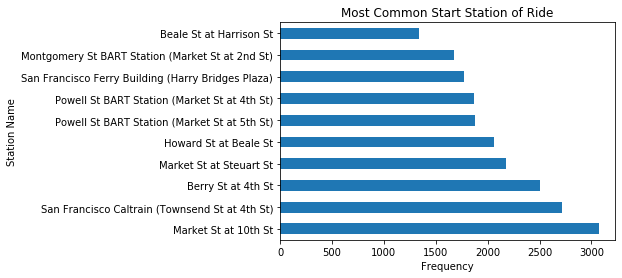

In [12]:
#Plotting a bar graph for top 10 pickup points
df.start_station_name.value_counts()[:10].plot(kind='barh')
plt.title('Most Common Start Station of Ride')
plt.xlabel('Frequency')
plt.ylabel('Station Name')
plt.show()

> It can be seen that the most common pick-up station is `Market St at 10th St` with around 3100 pickups followed by `San Francisco Caltrain` with around 2700 pickups.

#### What are the most busy hours for a bike ride

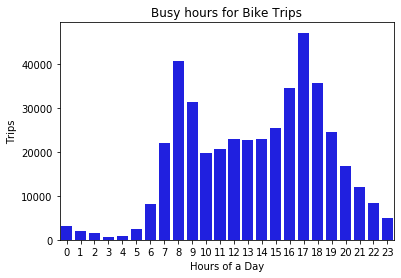

In [13]:
#Plotting a countplot
sb.countplot(df.start_hour, color='blue')
plt.title('Busy hours for Bike Trips')
plt.xlabel('Hours of a Day')
plt.ylabel('Trips')
plt.show()

> Seeing the above visualization, we can say that `8:00 am` and `5:00 pm` are most busy hours for bike trips. This could be because these are the office arrival and departure hours respectively of an employee.

#### What kind of users are more actively using the app?

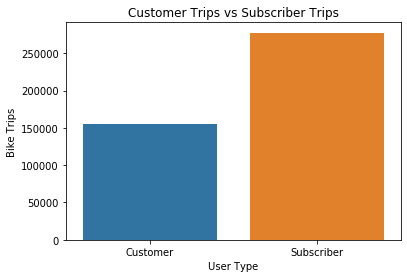

In [14]:
sb.countplot(df.user_type)
plt.title('Customer Trips vs Subscriber Trips')
plt.xlabel('User Type')
plt.ylabel('Bike Trips')
plt.show()

> This graph depicts that customers that are subscribed to the Bike Trip service take way more trips than casual users.

#### What mode do people use the most to book the rides?

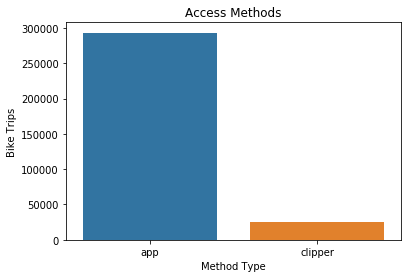

In [15]:
#Plotting the countplot
sb.countplot(df.rental_access_method)
plt.title('Access Methods')
plt.xlabel('Method Type')
plt.ylabel('Bike Trips')
plt.show()

> We can conclude that most of the ride requests were made via the app.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
The only different thing I found in data was that casual riders were way less than the subscribed riders.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
The data was tidy but some improvements in the data were made. Such as the start_time was of string type but it should be `datetime` to make it more flexible.

<a id='bivariate'></a>
## Bivariate Exploration

#### What is the distribution of duration of rides for the two types of users?

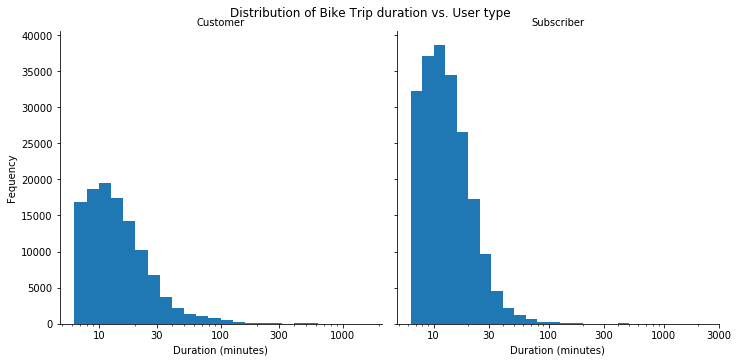

In [16]:
#Creating bin size
bin_edges = 10 ** np.arange(0.8, np.log10(df.duration_min.max()) + 0.1, 0.1)
#Plotting the two graphs
g = sb.FacetGrid(data = df, col = "user_type", height = 5)
g.map(plt.hist, "duration_min", bins = bin_edges)
g.fig.suptitle("Distribution of Bike Trip duration vs. User type", y = 1)
g.set_axis_labels("Duration (minutes)", "Fequency")
#Normalizing the data to have a better look
plt.xscale('log')
tick_locs = [10, 30, 100, 300, 1000, 3000]
plt.xticks(tick_locs, tick_locs)
g.set_titles('{col_name}');

> This can be seen that the frequency of rides by casual customers are not high but the duration of rides for both types of customers are almost the same.

#### What are the peak timings for the two kind of users?

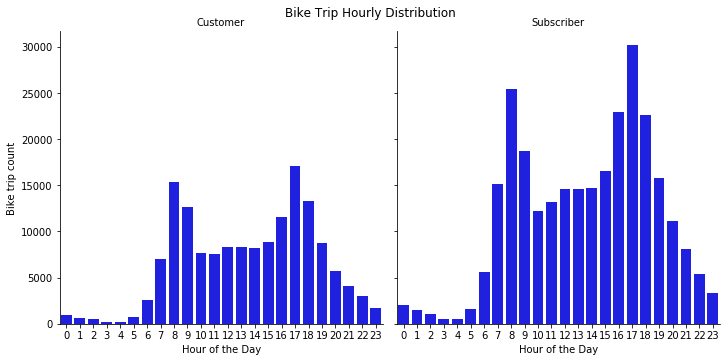

In [17]:
g = sb.catplot(data = df, x = "start_hour", col = "user_type", height = 5, 
               kind = "count", color = 'b')
g.fig.suptitle("Bike Trip Hourly Distribution", y = 1)
g.set_axis_labels("Hour of the Day", "Bike trip count")
g.set_titles("{col_name}");

> This shows that for both the types of customers, the peak timings for rides are the same, i.e. 800 hours and 1700 hours. 

#### Which days of a week are the most busy for the 2 types of users?

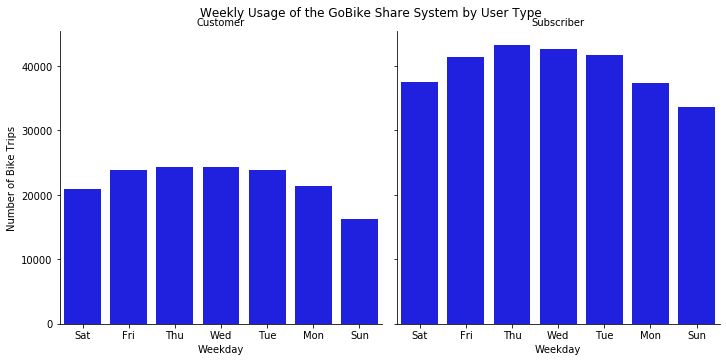

In [18]:
#Plotting a categorical graph
g = sb.catplot(data=df, x='start_day', col="user_type", kind='count', color='b')
g.set_axis_labels("Weekday", "Number of Bike Trips")
g.fig.suptitle('Weekly Usage of the GoBike Share System by User Type', y=1)
g.set_titles("{col_name}");

> This graph again proves that the distribution of casual and subscribed customers are almost the same. However, the number of rides by subscribed customers are way more than casual ones.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
There are a couple relationships that have been observed so far. Users uses the ride system mostly at 8:00am and 5:00pm. This could mean that users are using the bikes to travel to and from work since those hours are usually the beginning and end times of business hours each day of the week.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
It was observed that people use the bikes the least on a Sunday and the most during Weekdays.

<a id='multivariate'></a>
## Multivariate Exploration

#### What will be the most busy hours of every day of the week for the two kinds of users?

In [16]:
#Creating a function to plot the heatmap to avoid repetetion
def plotHeatMap(x):
    df2 = df[df.user_type == x].groupby(["start_hour", "start_day"]).bike_id.size().reset_index()
    df2 = df2.pivot("start_hour", "start_day",'bike_id')
    sb.heatmap(df2, cmap="Blues")
    plt.title(x, y=1)
    plt.xlabel('Weekday')
    plt.ylabel('Start Time (hour)')

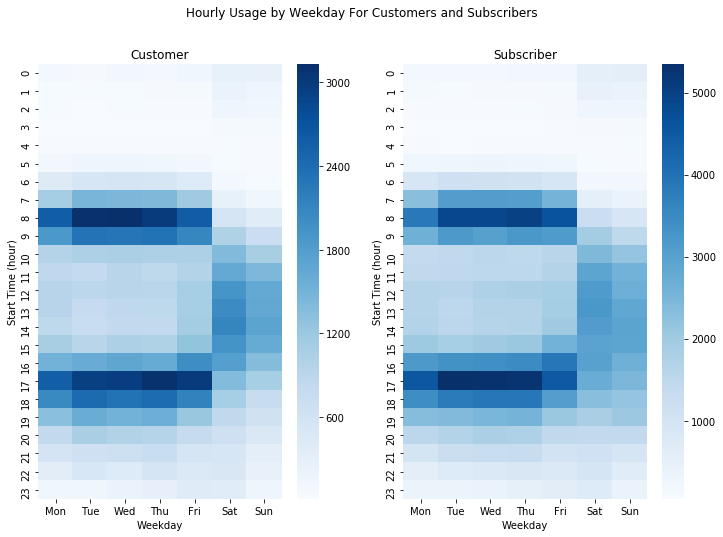

In [20]:
#Getting the days in order
df.start_day=pd.Categorical(df.start_day, categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)
#Plotting the heatmap using the defined function
plt.figure(figsize=(12,8))
plt.suptitle('Hourly Usage by Weekday For Customers and Subscribers')
plt.subplot(1, 2, 1)
plotHeatMap('Customer')
plt.subplot(1, 2, 2)
plotHeatMap('Subscriber')

> This heatmap displays how the number of rides vary by timings every day for both types of users, casual and subscribed. The darker portion shows more number of rides. This can be seen that just like we know, most of the rides are taken around 5pm and 8am on weekdays for both types of users. 

#### What is the average trip duration by hour for the different user types?

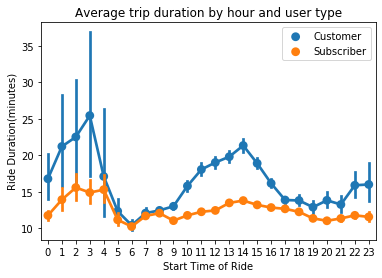

In [20]:
#Plotting a pointplot
sb.pointplot(data=df, x='start_hour', y='duration_min', hue='user_type')
plt.title('Average trip duration by hour and user type')
plt.xlabel('Start Time of Ride')
plt.ylabel('Ride Duration(minutes)')
plt.legend()
plt.show()

> This graph here shows the relation between the ride duration and start time of the ride for both types of user.

#### What is the trip duration for every day of a week for both type of users?

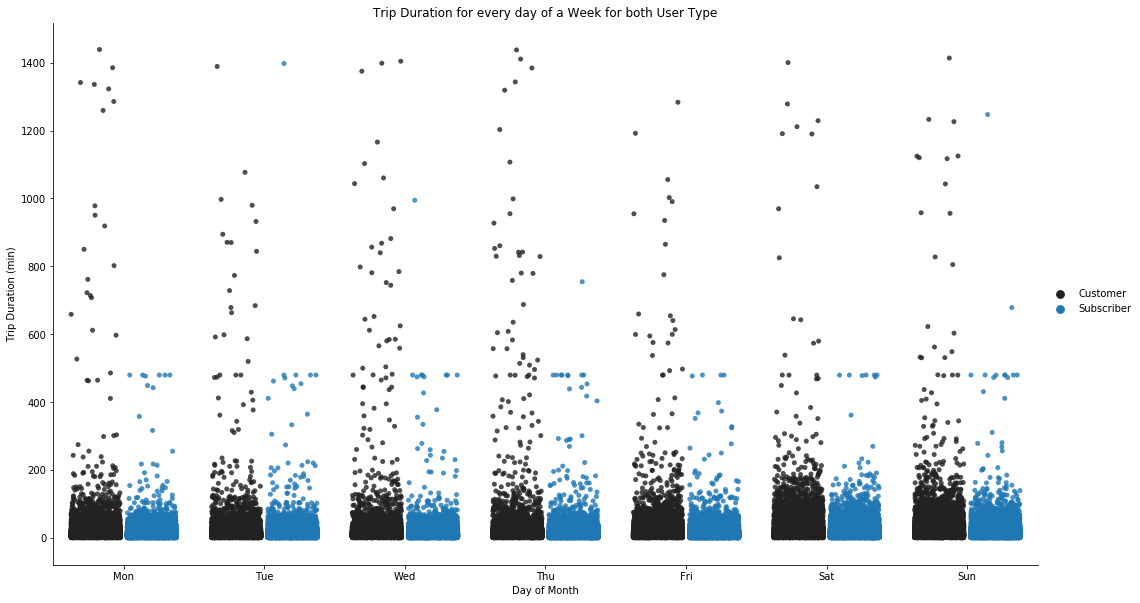

In [22]:
#Plotting a stripplot
g = sb.FacetGrid(data = df, height = 8.27, aspect = 14.70/8.27)
g.map(sb.stripplot, "start_day", "duration_min", "user_type", jitter = 0.35, dodge = True, alpha = 0.8)
g.add_legend()
plt.title("Trip Duration for every day of a Week for both User Type")
plt.xlabel("Day of Month")
plt.ylabel("Trip Duration (min)");

> This plot here shows the trip duration varying by the days of a week for both types of users. This can be seen that most of the long duration rides were made by casual customers instead of the subscribed ones.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> By using more than 2 variables in a graph, we were able to extract more information from a single graph instead of having to create seperate graphs. We saw the relation of ride duration with different days and time for both types of user. This made the visualization easy to read. 

### Were there any interesting or surprising interactions between features?

> The user type show an intersting behaviour, varying with respect to the time, hour and of the week.

## References
<ul>
    <li><a>https://seaborn.pydata.org/tutorial.html</a></li>
    <li><a>https://stackoverflow.com/questions/56478320/how-to-create-multiple-seaborn-heatmaps-with-a-shared-legend-in-one-figure</a></li>
</ul>